In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import preprocessing
from matplotlib.colors import LogNorm

In [3]:
import matplotlib.pyplot as plt
import warnings
from itertools import product

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
import time
import datetime

In [6]:
%matplotlib inline

# XGBoost

In [7]:
from sklearn import ensemble , cross_validation, learning_curve, metrics 

/Users/aurinko/anaconda/envs/Py27_proekt/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/aurinko/anaconda/envs/Py27_proekt/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [ ]:
import xgboost as xgb

# Загрузка готовых кусков csv выборок

In [9]:
# E_001 - E_005

# Sites 100 most popular as dummy
sites_train =  pd.read_csv('hundred_sites_dymmy_test.csv',',',  dayfirst=True)
sites_test = pd.read_csv('hundred_sites_dymmy_train.csv',',',  dayfirst=True)

# 3 in row (need to be transponed)
X_train_sitelines = pd.read_csv('three_in_row_site_lines.csv',',',  dayfirst=True)
X_test_sitelines = pd.read_csv('three_in_row_site_lines_20_TEST.csv',',',  dayfirst=True)





# 2 in row (need to be transponed)
X_train_sitelines_2 = pd.read_csv('two_in_row_site_lines.csv',',',  dayfirst=True)
X_test_sitelines_2 = pd.read_csv('two_in_row_site_lines_TEST.csv',',',  dayfirst=True)




# обработка данных с учетом расшифровки сайтов.



# 3 in row (need to be transponed) 50sht.
X_train_sitelines_3_50 = pd.read_csv('sor_alice_3inrow_friquent_than_50_count_all_set_matrix_31_10.csv',',',  dayfirst=True)
X_test_sitelines_3_50 = pd.read_csv('sor_alice_3inrow_friquent_than_50_count_all_set_matrix_31_10_test.csv',',',  dayfirst=True)

# 3 in row (need to be transponed) 20sht.
#X_train_sitelines_3_20 = pd.read_csv('sor_alice_3inrow_friquent_than_20_count_all_set_matrix_31_10.csv',',',  dayfirst=True)
#X_test_sitelines_3_20 = pd.read_csv('sor_alice_3inrow_friquent_than_20_count_all_set_matrix_31_10_test.csv',',',  dayfirst=True)

# TIME
time_train = pd.read_csv('time_train.csv',',',  dayfirst=True)
time_test = pd.read_csv('time_test.csv',',',  dayfirst=True)

# SITES
sites_scaled_train = pd.read_csv('df_sites_scaled.csv',',',  dayfirst=True)
sites_scaled_test = pd.read_csv('df_test_sites_scaled.csv',',',  dayfirst=True)

# Sites in first sec
first_sites_train = pd.read_csv('first_sites.csv',',',  dayfirst=True)
first_sites_test = pd.read_csv('first_sites_test.csv',',',  dayfirst=True)

# Sites first friquent 105 (appears >21 times)
sparse_matrix_train = pd.read_csv('sparse_matr_TRAIN_31_10.csv',',',  dayfirst=True)
sparse_matrix_test = pd.read_csv('sparse_matr_TEST_31_10.csv',',',  dayfirst=True)

In [12]:
#samples building
def build(first, second):#, therd, forth, fifth, sixs, seven):
    
    fich_names = np.hstack((first.columns, second.columns))
                            #, therd.columns, forth.columns, 
                            #fifth.columns, sixs.columns, seven.columns))
     
    
    X = np.hstack((np.array(first.values), np.array(second.values)))
                   #, np.array(therd.values), np.array(forth.values), 
                   #np.array(fifth.values), np.array(sixs.values), np.array(seven.values)))
    
    return X, fich_names

In [36]:
# Sites in first sec
f_sites_train = pd.read_csv('f_train_nov11.csv',',',  dayfirst=True)
df_sites_train = pd.read_csv('df_train_nov11.csv',',',  dayfirst=True)

y = pd.read_csv('target_train_nov11.csv',',',  dayfirst=True)

#first_sites_test = pd.read_csv('first_sites_test.csv',',',  dayfirst=True)


#TEST
f_sites_test = pd.read_csv('f_test_nov11.csv',',',  dayfirst=True)
df_sites_test = pd.read_csv('df_test_nov11.csv',',',  dayfirst=True)

#droped_id = pd.read_csv(''ind_from_nan.npy'',',',  dayfirst=True)

In [22]:
df_sites_train.head()

,Wednesday,Saturday,Sunday,Hour_8,Hour_9,Hour_10,Hour_11,Hour_14,Hour_15,Hour_19_23,M_0,M_1,M_4,M_summer,M_9,M_10,M_11
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


X_train_sitelines_3_50,time_train,sites_scaled_train,first_sites_train,sparse_matrix_train,X_train_sitelines_2

X_test_sitelines_3_50,time_test,sites_scaled_test,first_sites_test,sparse_matrix_test,X_test_sitelines_2

In [37]:
# Объединение


# TRAIN
X,fich_names =  build (f_sites_train, df_sites_train) 

y = np.load('target_nov10.npy')

# TEST

X_TEST, _ =  build (f_sites_test, df_sites_test) 
#                   sparse_matrix_test,X_test_sitelines_2,sites_test)

fich_names[:5]

array(['dayOfyear', 'Day', 'TimeMinOfDay', 'time1-2', 'time2-3'], dtype=object)

In [38]:
from sklearn.cross_validation import train_test_split
# Разбиение выборки

# Разбиение выборки
X_train_big, X_test, y_train_big, y_test = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state=42)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_train_big, y_train_big,
                                                  test_size = 0.2,
                                                  random_state=42)

# Нормальное деление (data, label=label, missing=-999.0)
xgdmat_train = xgb.DMatrix(X_train_sm, label = y_train_sm) 
xgdmat_test = xgb.DMatrix(X_test_sm, label = y_test_sm) 
xgdmat_test_final = xgb.DMatrix(X_test)
xgdmat = xgb.DMatrix(X_test_sm) 
xgdmat_for_evaluation = xgb.DMatrix(X, label = y) 
xgdmat_TEST = xgb.DMatrix(X_TEST)

In [39]:
namexy = np.hstack((fich_names,'y'))[:3]

# XGBoost

In [27]:
# 0.84039
num_boost_round = 999

our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'eval_metric' : 'error',
             'objective': 'binary:logistic', 'max_depth':11, 'min_child_weight':1,
              'n_estimators': 10,'learning_rate': 0.1}


model = xgb.train(
    our_params,
    xgdmat_train,
    num_boost_round=num_boost_round,
    evals=[(xgdmat_test, "Test")],
    early_stopping_rounds=15)

Will train until Test error hasn't decreased in 15 rounds.
[0]	Test-error:0.009278
[1]	Test-error:0.009089
[2]	Test-error:0.009143
[3]	Test-error:0.008899
[4]	Test-error:0.008899
[5]	Test-error:0.008818
[6]	Test-error:0.008602
[7]	Test-error:0.008602
[8]	Test-error:0.008494
[9]	Test-error:0.008494
[10]	Test-error:0.008521
[11]	Test-error:0.008412
[12]	Test-error:0.008358
[13]	Test-error:0.008250
[14]	Test-error:0.008223
[15]	Test-error:0.008196
[16]	Test-error:0.008223
[17]	Test-error:0.008142
[18]	Test-error:0.008142
[19]	Test-error:0.008142
[20]	Test-error:0.008169
[21]	Test-error:0.008196
[22]	Test-error:0.008169
[23]	Test-error:0.008196
[24]	Test-error:0.008196
[25]	Test-error:0.008115
[26]	Test-error:0.008142
[27]	Test-error:0.008142
[28]	Test-error:0.008061
[29]	Test-error:0.008061
[30]	Test-error:0.008142
[31]	Test-error:0.008115
[32]	Test-error:0.008088
[33]	Test-error:0.008007
[34]	Test-error:0.007953
[35]	Test-error:0.007926
[36]	Test-error:0.007899
[37]	Test-error:0.007899
[

In [28]:
print("Best error: {} in {} rounds".format(model.best_score, model.best_iteration+1))

Best error: 0.00779 in 41 rounds


In [ ]:
Best error: 0.00779 in 41 rounds # новая выборка

Best error: 0.002637 in 132 rounds
    
Best error: 0.003278 in 47 rounds
Best error: 0.002835 in 100 rounds
    
    
    

Best error: 0.002982 in 95 rounds   'max_depth':11 early_stopping_rounds=10 'eval_metric' : 'error'

Best error: 0.002899 in 102 rounds  'max_depth':11 early_stopping_rounds=10 'eval_metric' : 'error'
Best error: 0.002899 in 102 rounds  'max_depth':11 early_stopping_rounds=15 'eval_metric' : 'error'


Best error: 0.008213 in 151 rounds  'max_depth':11 early_stopping_rounds=15 'eval_metric' : 'logloss' (знатно переобучается)
Best error: 0.003116 in 84 rounds  'max_depth':10 early_stopping_rounds=15  'eval_metric' :'error'
Best error: 0.00282 in 106 rounds  'max_depth':11 early_stopping_rounds=10
Best error: 0.00282 in 106 rounds  'max_depth':13
Best error: 0.003175 in 46 rounds  'max_depth':22
Best error: 0.003056 in 41 rounds
Best error: 0.003056 in 41 rounds
Best error: 0.003155 in 45 rounds

our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 
             'objective': 'binary:logistic', 'max_depth':22, 'min_child_weight':1,
              'n_estimators': 10,'learning_rate': 0.1}

In [ ]:
xgb1.fit(xgtrain, y, eval_metric='auc')
dtrain_predictions = xgb1.predict(xgtest)   

In [31]:
start_time = time.time()

now = datetime.datetime.now()
print (now)

final_gb = xgb.train(our_params, xgdmat_train, num_boost_round = model.best_iteration+1)

print("--- %s sec ---" % (time.time() - start_time)) 

2017-11-11 15:45:09.945347
--- 23.4603462219 sec ---


In [34]:
y_pred = final_gb.predict(xgdmat) # Predict using our testdmat
print ('y_pred', y_pred[:5])

y_pred[y_pred > 0.2] = 1
y_pred[y_pred <= 0.2] = 0


print ('matrix_test_sm') 
print (metrics.confusion_matrix(y_test_sm, y_pred))
print ("")
print ('test', metrics.f1_score(y_test_sm, y_pred))


# final

y_pred_f = final_gb.predict(xgdmat_test_final) # Predict using our testdmat
print ('y_pred_f', y_pred_f[:5])

y_pred_f[y_pred_f > 0.2] = 1
y_pred_f[y_pred_f <= 0.2] = 0


print ('matrix_test') 
print (metrics.confusion_matrix(y_test, y_pred_f))
print ("")
print ('test', metrics.f1_score(y_test, y_pred_f))

('y_pred', array([ 0.00808874,  0.01248377,  0.00816265,  0.00808874,  0.00845189], dtype=float32))
matrix_test_sm
[[36345   266]
 [  109   249]]

('test', 0.57044673539518898)
('y_pred_f', array([ 0.00948131,  0.00816265,  0.00808874,  0.00845189,  0.00808874], dtype=float32))
matrix_test
[[45434   342]
 [  127   308]]

('test', 0.56774193548387097)


In [ ]:
matrix_test
[[50255     0]
 [    7   451]]

('test', 0.99229922992299235)

In [ ]:
matrix_test
[[50255     0]
 [   30   426]]

('test', 0.94833524684270953)

In [40]:
fs = final_gb.get_fscore()
len(fs)

27

In [46]:
for i in range(len(tos)):
    tos.real = int(tos.feature[i].split('f')[-1])

In [47]:
tos = pd.DataFrame(final_gb.get_fscore().items(), columns=['feature','importance'])
tos['real'] = tos.feature
tos.head()

,feature,importance,real
0,f0,827,f0
1,f1,386,f1
2,f2,1360,f2
3,f3,210,f3
4,f4,226,f4


In [44]:
tos.shape

(27, 3)

In [45]:
len(fich_names)

37

In [48]:
importances = final_gb.get_fscore()
#importances

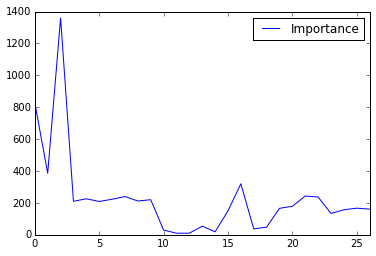

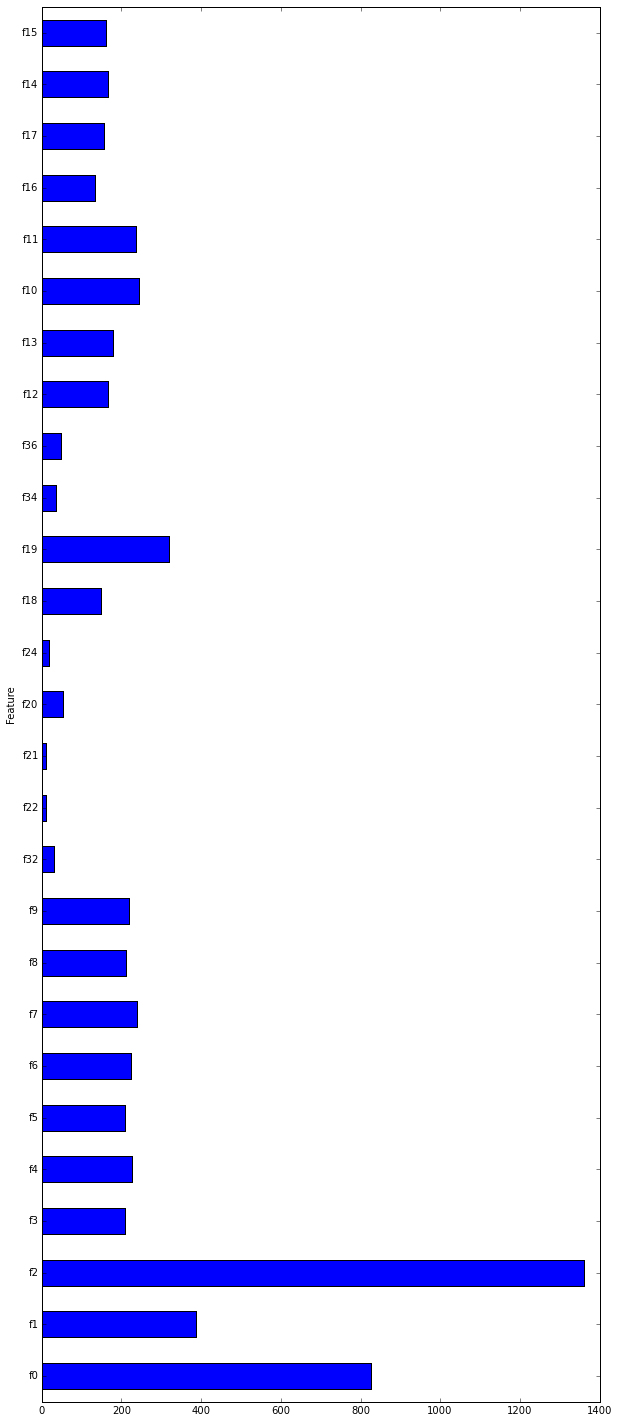

In [49]:
features = fich_names
df = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})

plt.figure()
df.plot()
df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 25))

In [50]:
final_gb.get_fscore()

{'f0': 827,
 'f1': 386,
 'f10': 243,
 'f11': 237,
 'f12': 166,
 'f13': 179,
 'f14': 167,
 'f15': 161,
 'f16': 134,
 'f17': 157,
 'f18': 150,
 'f19': 320,
 'f2': 1360,
 'f20': 54,
 'f21': 10,
 'f22': 10,
 'f24': 19,
 'f3': 210,
 'f32': 30,
 'f34': 37,
 'f36': 48,
 'f4': 226,
 'f5': 209,
 'f6': 223,
 'f7': 240,
 'f8': 212,
 'f9': 220}

In [51]:
importances_full_set = importances
most_important = []
for i in list(importances_full_set.keys()):
    if importances_full_set[i] > 20:
        #print (int(i.split('f')[-1]), importances_full_set[i])
        
        most_important.append(int(i.split('f')[-1]))

In [52]:
np.save('most_important_fitures_XGBoo.npy', most_important)

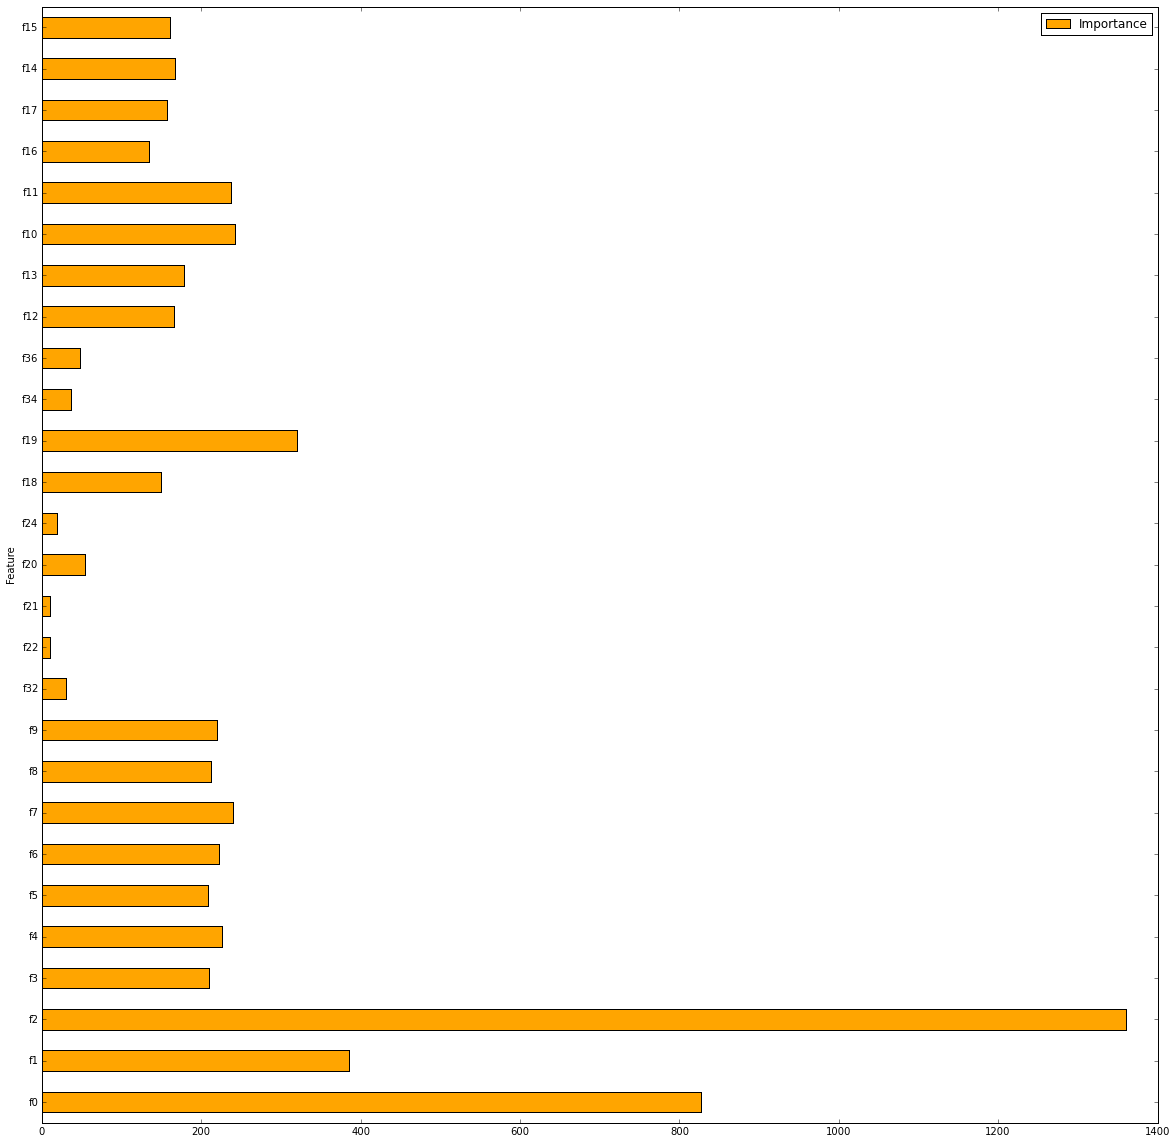

In [53]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
#importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (20,20), color = 'orange')

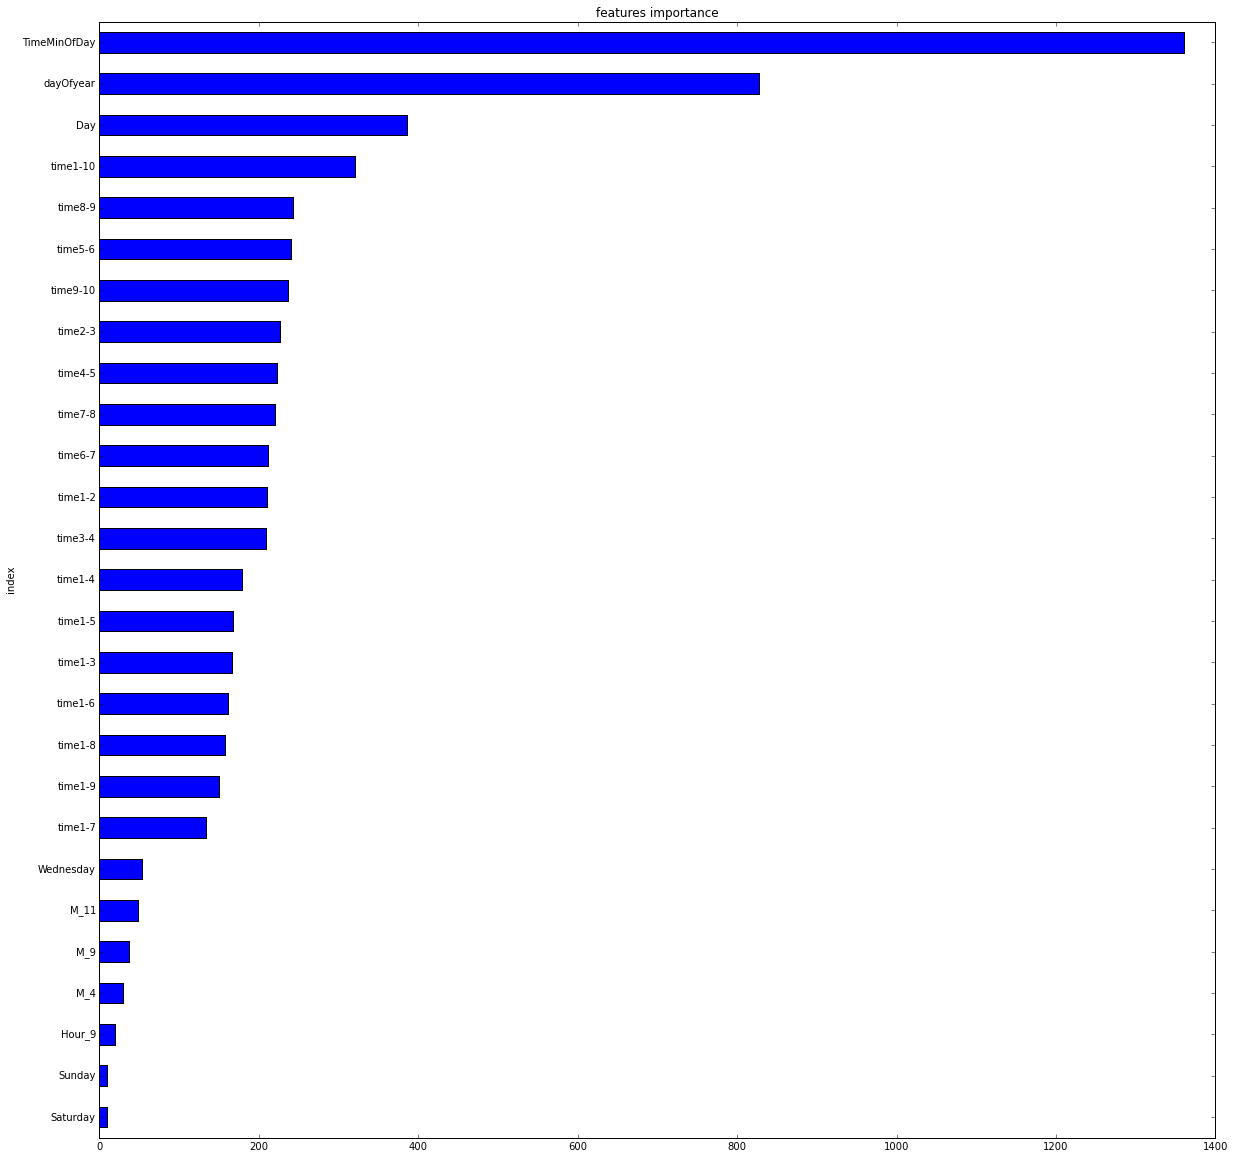

In [59]:
features = fich_names#[ "your list of features ..." ]
mapFeat = dict(zip(["f"+str(i) for i in range(len(features))],features))
ts = pd.Series(final_gb.get_fscore())
ts.index = ts.reset_index()['index'].map(mapFeat)
ts.order()[:].plot(kind="barh", title=("features importance"), figsize = (20,20))

In [60]:
# 

start_time = time.time()

now = datetime.datetime.now()
print (now)

final_gb = xgb.train(our_params, xgdmat_for_evaluation, num_boost_round = model.best_iteration+1)

print("--- %s sec ---" % (time.time() - start_time)) 

2017-11-11 16:01:39.317989
--- 40.7676851749 sec ---


In [95]:
#Short

most_important = np.load('most_important_fitures_XGBoo.npy')
most_important[:10]

# Делаю короткую выборку, в которой importances > 10
X_short = X[:,(most_important)]

X_TEST_short = X_TEST[:,(most_important)]

#fich_names_short = fich_names[(most_important)]


# Разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(X_short, y,
                                                  test_size = 0.2,
                                                  random_state=42)

# Нормальное деление SHORT

xgdmat_train = xgb.DMatrix(X_train, y_train) 
xgdmat_test = xgb.DMatrix(X_test, y_test) 
xgdmat = xgb.DMatrix(X_test) 
xgdmat_for_evaluation = xgb.DMatrix(X_short, y) 

xgdmat_TEST_short = xgb.DMatrix(X_TEST_short)

In [96]:
start_time = time.time()

now = datetime.datetime.now()
print (now)

final_gb = xgb.train(our_params, xgdmat_for_evaluation, num_boost_round = model.best_iteration+1)

print("--- %s sec ---" % (time.time() - start_time)) 

2017-11-02 19:14:29.035690
--- 373.51574707 sec ---


In [61]:
y_pred = final_gb.predict(xgdmat) # Predict using our testdmat
y_pred

array([ 0.0080699 ,  0.00965812,  0.00805329, ...,  0.0080699 ,
        0.00815317,  0.0080699 ], dtype=float32)

In [98]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [99]:
print ('matrix_test') 
print (metrics.confusion_matrix(y_test, y_pred))
print ("")
print ('test', metrics.f1_score(y_test, y_pred))

matrix_test
[[50255     0]
 [   11   447]]

('test', 0.98784530386740321)


matrix_test
[[50255     0]
 [   31   427]]

('test', 0.96497175141242941)

# Передсказание на рабочем тесте
# SUB 8


In [62]:
y_pred_TEST = final_gb.predict(xgdmat_TEST)

In [63]:
y_pred_TEST

array([ 0.0080699 ,  0.0080699 ,  0.00876443, ...,  0.0080699 ,
        0.0080699 ,  0.00805329], dtype=float32)

In [64]:
y_pred_TEST[y_pred_TEST>0.5]

array([ 0.54340696,  0.57383996,  0.5381155 ,  0.56924909,  0.64717114,
        0.51104289,  0.80396217,  0.58617896,  0.65881169,  0.54871887,
        0.77896971,  0.5775817 ,  0.82013297,  0.54524159,  0.76332915,
        0.74115539,  0.55415303,  0.7250464 ,  0.74115539,  0.57833773,
        0.65296692,  0.72182566,  0.59761012,  0.51361167,  0.68286818,
        0.58122057,  0.57624531,  0.50459439,  0.63888669,  0.55447733,
        0.53158915,  0.78065717,  0.52862722,  0.5034343 ,  0.56619996,
        0.50446588,  0.67694873,  0.7646718 ,  0.6036945 ,  0.57714909,
        0.59477925,  0.75095773,  0.56744373,  0.65608448,  0.69862747,
        0.61756605,  0.77214211,  0.69042498], dtype=float32)

# загрузка с неполной выборкой

In [98]:
#82797
nan_id = np.load('ind_from_nan.npy')
not_nan_id = np.load('ind_from_not_nan.npy')
zerr = np.zeros(len(nan_id))

# создаю полную строку id
session_id_full = np.hstack([not_nan_id,nan_id])

p = y_pred_TEST

# создаю полную строку ответов
answ = np.hstack([p,zerr])



In [99]:
resalt_after_pred = np.vstack([not_nan_id, p])
resalt_for_0 = np.vstack([nan_id, zerr])
resalt = np.hstack([resalt_after_pred, resalt_for_0])

In [100]:
resalt

array([[  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
          8.27500000e+04,   8.27690000e+04,   8.27930000e+04],
       [  8.06990080e-03,   8.06990080e-03,   8.76443181e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [101]:
resalt.T[:10]

array([[  1.00000000e+00,   8.06990080e-03],
       [  2.00000000e+00,   8.06990080e-03],
       [  3.00000000e+00,   8.76443181e-03],
       [  4.00000000e+00,   8.05329066e-03],
       [  5.00000000e+00,   8.29802733e-03],
       [  6.00000000e+00,   8.06990080e-03],
       [  7.00000000e+00,   8.29802733e-03],
       [  9.00000000e+00,   8.06990080e-03],
       [  1.00000000e+01,   8.06990080e-03],
       [  1.10000000e+01,   9.46080871e-03]])

In [102]:
session_id_full

array([    1,     2,     3, ..., 82750, 82769, 82793])

In [103]:
nan_id

array([    8,    22,    34, ..., 82750, 82769, 82793])

In [104]:
not_nan_id[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11])

In [118]:
#d = {'session_id': session_id_full, 'target': answ}
b = pd.DataFrame(data=resalt.T )
b.columns = ['session_id', 'target']
b.head(10)

,session_id,target
0,1,0.008070
1,2,0.008070
2,3,0.008764
3,4,0.008053
4,5,0.008298
5,6,0.008070
6,7,0.008298
7,9,0.008070
8,10,0.008070
9,11,0.009461


In [119]:
b.tail(10)

,session_id,target
82787,82678,0
82788,82682,0
82789,82685,0
82790,82689,0
82791,82692,0
82792,82724,0
82793,82726,0
82794,82750,0
82795,82769,0
82796,82793,0


In [120]:
#создаю датафрейм ответа
d = {'session_id': session_id_full, 'target': answ}
a = pd.DataFrame(data=d )
a.head(10)



,session_id,target
0,1,0.008070
1,2,0.008070
2,3,0.008764
3,4,0.008053
4,5,0.008298
5,6,0.008070
6,7,0.008298
7,9,0.008070
8,10,0.008070
9,11,0.009461


In [125]:
(a == b).all()

session_id    True
target        True
dtype: bool

In [126]:
a.to_csv('TEST_11_nov_SUB.csv', sep=',', index=False)
a.head()

,session_id,target
0,1,0.008070
1,2,0.008070
2,3,0.008764
3,4,0.008053
4,5,0.008298


In [102]:
# Подготовка к загрузке на кегл
p = y_pred_TEST

# Преобразования ответа



# создаю полную строку сессий
session_id_full = range(1, len(p)+1)

print (len(session_id_full))
print (len(p))

#создаю датафрейм ответа
d = {'session_id': session_id_full, 'target': p}
a = pd.DataFrame(data=d )
a.head()

a.to_csv('TEST_8_SUB.csv', sep=',', index=False)
a.head()

82797
82797


,session_id,target
0,1,0.005327
1,2,0.005326
2,3,0.008781
3,4,0.003490
4,5,0.020907


In [115]:
# загружаю номера сессий с нанами (они не участвовали ни в обучении, ни в тесте)
nan_id = np.load('nan_id.npy')

In [116]:
nan_id

array([    8,    22,    34, ..., 82750, 82769, 82793])

In [126]:
fid = []
for i in nan_id:
    fid.append(a.target[a.session_id == i].values)
    #print (a[a.target[a.session_id == i] > 0.01])
fid

[array([ 0.00428744], dtype=float32),
 array([ 0.00832282], dtype=float32),
 array([ 0.00028273], dtype=float32),
 array([ 0.01279459], dtype=float32),
 array([ 0.00745319], dtype=float32),
 array([ 0.00950533], dtype=float32),
 array([ 0.00618406], dtype=float32),
 array([  4.97042492e-05], dtype=float32),
 array([ 0.0055753], dtype=float32),
 array([ 0.00342923], dtype=float32),
 array([  9.07303838e-05], dtype=float32),
 array([ 0.00511674], dtype=float32),
 array([ 0.00587543], dtype=float32),
 array([ 0.0038129], dtype=float32),
 array([ 0.00632716], dtype=float32),
 array([ 0.00456197], dtype=float32),
 array([ 0.00049724], dtype=float32),
 array([  7.78604153e-05], dtype=float32),
 array([  9.30806709e-05], dtype=float32),
 array([ 0.0001037], dtype=float32),
 array([ 0.0045331], dtype=float32),
 array([  6.77430507e-05], dtype=float32),
 array([ 0.0001788], dtype=float32),
 array([ 0.00468619], dtype=float32),
 array([ 0.00443031], dtype=float32),
 array([ 0.00035308], dtype=fl

In [127]:
mean(fid)

0.0046916264

In [130]:
for i in fid:
    if i > 0.01:
        print (i)

[ 0.01279459]
[ 0.01877168]
[ 0.01322413]
[ 0.01251235]
[ 0.01488211]
[ 0.01168268]
[ 0.01149364]
[ 0.01028711]
[ 0.01663245]
[ 0.0149282]
[ 0.01476812]
[ 0.01670224]
[ 0.01165742]
[ 0.0141459]
[ 0.01509605]
[ 0.01115044]
[ 0.01656609]
[ 0.01371575]
[ 0.01001236]
[ 0.01701625]
[ 0.01352882]
[ 0.01751794]
[ 0.01272929]
[ 0.01168946]
[ 0.01165705]
[ 0.01072666]
[ 0.021342]
[ 0.01801453]
[ 0.01300372]
[ 0.01270328]
[ 0.01099098]
[ 0.01584809]
[ 0.02239985]
[ 0.02235116]
[ 0.01161007]
[ 0.01341402]
[ 0.01004789]
[ 0.01066393]
[ 0.01594569]
[ 0.01617413]
[ 0.01436767]
[ 0.0217253]
[ 0.01879221]
[ 0.02449019]
[ 0.01387919]
[ 0.01002302]
[ 0.01037497]
[ 0.01418243]
[ 0.01282576]
[ 0.016046]
[ 0.01163978]
[ 0.01019379]
[ 0.01060414]
[ 0.01137509]
[ 0.01165938]
[ 0.01539874]
[ 0.01172803]
[ 0.0133248]
[ 0.01312161]
[ 0.0240727]
[ 0.0172653]
[ 0.013301]
[ 0.01551343]
[ 0.02540883]
[ 0.01281873]
[ 0.01011707]
[ 0.01127789]
[ 0.01728297]
[ 0.01522405]
[ 0.01256074]
[ 0.01047022]
[ 0.01063771]
[ 0.

[ 0.01106484]
[ 0.01138703]
[ 0.01942905]
[ 0.01595401]
[ 0.01288842]
[ 0.01025383]
[ 0.01061472]
[ 0.01769284]
[ 0.01601892]
[ 0.01276079]
[ 0.02622153]
[ 0.01263502]
[ 0.01901378]
[ 0.01097697]
[ 0.01185007]
[ 0.01472269]
[ 0.02130864]
[ 0.01368446]
[ 0.01712172]
[ 0.01750414]
[ 0.02010679]
[ 0.01546146]
[ 0.0185279]
[ 0.01130761]
[ 0.01681104]
[ 0.01536118]
[ 0.01423073]
[ 0.01715456]
[ 0.01269678]
[ 0.01331731]
[ 0.01219656]
[ 0.01026164]
[ 0.01011461]
[ 0.01347628]
[ 0.01549416]
[ 0.02243647]
[ 0.01453093]
[ 0.01188252]
[ 0.01424562]
[ 0.01636739]
[ 0.01918828]
[ 0.01107707]
[ 0.01036988]
[ 0.01014518]
[ 0.01565612]


In [128]:
fid > 0.1

True

In [118]:
a[a.session_id == 1]

,session_id,target
0,1,0.005327


In [134]:
b.head(1)

,session_id,target
0,1,0.005327


In [140]:
b = a
br = p
for i in br:
    if i > 0.05:
        print (i)

0.0626151
0.0515152
0.0551046
0.0703486
0.0825784
0.0539323
0.0626661
0.064266
0.0809897
0.071385
0.05978
0.0826047
0.0663563
0.0823051
0.0505764
0.0604411
0.0551046
0.0708812
0.0632034


# XGBoost настройка

In [16]:
from sklearn.grid_search import GridSearchCV

In [ ]:
'learning_rate': 0.1, 'n_estimators': 1000, 'seed':42, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'
                'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8,

In [23]:
cv_params = {'max_depth':[22,25,30]}
ind_params = {'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'min_child_weight':1,
              'n_estimators': 30,'learning_rate': 0.1}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'f1', cv = 3) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [24]:
optimized_GBM.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, n_estimators=30, nthread=-1,
       objective='binary:logistic', seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [22, 25, 30]}, pre_dispatch='2*n_jobs',
       refit=True, score_func=None, scoring='f1', verbose=0)

In [25]:
optimized_GBM.grid_scores_

[mean: 0.63381, std: 0.01322, params: {'max_depth': 22},
 mean: 0.63264, std: 0.01098, params: {'max_depth': 25},
 mean: 0.63238, std: 0.01128, params: {'max_depth': 30}]

In [ ]:
[mean: 0.63381, std: 0.01322, params: {'max_depth': 22},
 mean: 0.63264, std: 0.01098, params: {'max_depth': 25},
 mean: 0.63238, std: 0.01128, params: {'max_depth': 30}]

In [ ]:
[mean: 0.56751, std: 0.02093, params: {'max_depth': 10},
 mean: 0.60860, std: 0.01024, params: {'max_depth': 15},
 mean: 0.62386, std: 0.00707, params: {'max_depth': 20}]

In [ ]:
{'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'min_child_weight':1,
              'n_estimators': 30,'learning_rate': 0.1}

In [ ]:
# сессия без учета последовательности сайтов

In [ ]:
[mean: 0.75384, std: 0.00782, params: {'colsample_bytree': 0.8},
 mean: 0.76864, std: 0.02027, params: {'colsample_bytree': 1}]

In [ ]:
mean: 0.76864, std: 0.02027, params: {'learning_rate': 0.1},
mean: 0.75809, std: 0.01103, params: {'learning_rate': 0.2},
mean: 0.76235, std: 0.01677, params: {'learning_rate': 0.3}

In [ ]:
[mean: 0.63728, std: 0.00292, params: {'n_estimators': 10},
 mean: 0.73457, std: 0.01659, params: {'n_estimators': 50}
 mean: 0.76486, std: 0.01842, params: {'n_estimators': 100},
 mean: 0.76864, std: 0.02027, params: {'n_estimators': 150]

In [ ]:
[mean: 0.76486, std: 0.01842, params: {'min_child_weight': 1},
 mean: 0.73891, std: 0.01382, params: {'min_child_weight': 3},
 mean: 0.70740, std: 0.00792, params: {'min_child_weight': 5}]

In [ ]:
[mean: 0.74892, std: 0.01660, params: {'max_depth': 10},
[mean: 0.76101, std: 0.01516, params: {'max_depth': 18},
 mean: 0.75797, std: 0.01374, params: {'max_depth': 20},
 mean: 0.76486, std: 0.01842, params: {'max_depth': 22}]
 mean: 0.75292, std: 0.02066, params: {'max_depth': 30}]

In [76]:
print ('matrix_test') 
print (metrics.confusion_matrix(y_test_sm, optimized_GBM.predict(X_test_sm)))
print ("")
print ('test', metrics.f1_score(y_test_sm, optimized_GBM.predict(X_test_sm)))

print ('matrix_test') 
print (metrics.confusion_matrix(y_test, optimized_GBM.predict(X_test)))
print ("")
print ('test', metrics.f1_score(y_test, optimized_GBM.predict(X_test)))

matrix_test
[[40173    33]
 [  158   206]]

('test', 0.68325041459369817)
matrix_test
[[50219    36]
 [  176   282]]

('test', 0.72680412371134018)


In [ ]:
matrix_test
[[40173    33]
 [  158   206]]

('test', 0.68325041459369817)
matrix_test
[[50219    36]
 [  176   282]]

('test', 0.72680412371134018)

In [12]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return [('gini', gini_score)]

In [15]:
from sklearn.cross_validation import KFold

In [22]:
from xgboost import XGBClassifier

In [23]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=0, silent=True,
       subsample=1)

In [25]:
print ('matrix_test') 
print (metrics.confusion_matrix(y_test_sm, model.predict(X_test_sm)))
print ("")
print ('test', metrics.f1_score(y_test_sm, model.predict(X_test_sm)))

print ('matrix_test') 
print (metrics.confusion_matrix(y_test, model.predict(X_test)))
print ("")
print ('test', metrics.f1_score(y_test, model.predict(X_test)))

matrix_test
[[40199     7]
 [  279    85]]

('test', 0.37280701754385964)
matrix_test
[[50248     7]
 [  331   127]]

('test', 0.429054054054054)


In [ ]:
xgb_params = {
        'eta': 0.02,
        'max_depth': 6,
        'subsample': 0.9,
        'objective': 'binary:logistic',
        'silent': 1,
        'colsample_bytree': 0.9}

In [ ]:
xgb_preds = []

# params configuration also from anokas' kernel


train_big = xgb.DMatrix(X_train_big_g, y_train_big_g)
test = xgb.DMatrix(X_test_g, y_test_g)
train = xgb.DMatrix(X_train_sm_g, y_train_sm_g)

In [ ]:
model = xgb.train(xgb_params, d_train, num_boost_round = 600)

xgb_pred = model.predict(d_test)

In [58]:
xgb_pred 

In [27]:
d_valid = xgb.DMatrix(X_test)

xgb_pred_val = model.predict(d_valid)

In [24]:
xgb_pred_val

array([ 0.04999888,  0.03935826,  0.03157259, ...,  0.02098013,
        0.01868199,  0.13389409], dtype=float32)

In [33]:
#Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [41]:
pereschet = []
for i in range(len(xgb_pred_val)):
    if xgb_pred_val[i] > 0.055:
        pereschet.append(1)
    else: 
        pereschet.append(0)

In [ ]:
# Confusion matrix
print 'confusion_matrix'
print
print confusion_matrix(y_test, pereschet)
print  

# Precision 
print 'precision_score  ' , precision_score(y_test, pereschet)
print

# Recall
print 'recall_score     ', recall_score(y_test, pereschet)
print
# F1 score
print 'f1_score         ', f1_score(y_test,pereschet)
print


In [53]:
import pandas as pd

In [84]:
id_test = sub['id'].values

In [85]:
preds = sub['mean'].values

In [86]:
output = pd.DataFrame({'id': id_test, 'target': preds})

In [95]:
output.to_csv("second_sub_mean.csv", index=False)

In [22]:
xgb_pred = model.predict(d_test)

In [23]:
xgb_pred

array([ 0.02519413,  0.02382817,  0.03300509, ...,  0.03440644,
        0.03141858,  0.03043357], dtype=float32)

### Кривые обучения для деревьев большей глубины

In [53]:
# params configuration also from anokas' kernel
xgb_params = {
        'eta': 0.02,
        'max_depth': 6,
        'subsample': 0.9,
        'objective': 'binary:logistic',
        'silent': 1,
        'colsample_bytree': 0.9
    }

   # estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)



In [57]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    print n_tree
    estimator = xgb.XGBClassifier(xgb_params)
    score = cross_validation.cross_val_score(estimator, X_train, y_train, 
                                             scoring = 'accuracy', cv = 10)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

1
10
20
CPU times: user 3min 6s, sys: 20 s, total: 3min 26s
Wall time: 3min 44s


In [68]:
xgb_scoring.mean(axis = 1)

matrix([[ 0.96373678],
        [ 0.96373678],
        [ 0.96373678]])

In [69]:
xgb_scoring_1_15_trees.mean(axis = 1)

matrix([[ 0.96373677],
        [ 0.96373677],
        [ 0.96373677]])

In [64]:
xgb_scoring_1_15_trees =         matrix([[0.96373455,  0.963739  ],
        [ 0.96373455,  0.963739  ],
        [ 0.96373455,  0.963739  ]])

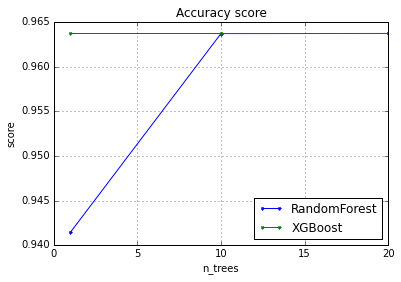

In [71]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
#pylab.plot(n_trees, xgb_scoring_1_15_trees.mean(axis = 1), marker='o', label='XGBoost_old')


pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [43]:
xgb_scoring_1_15_trees = xgb_scoring

In [32]:
from sklearn.model_selection import train_test_split
# Разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y,
                                                  test_size = 0.2,
                                                  random_state=42)



In [33]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [34]:
#In order to calculate the CLASS WEIGHT do the following

from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(encoded_y), encoded_y)

In [35]:
class_weight

array([  0.51891309,  13.71835531])

In [36]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=148, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [90]:
model = create_baseline()
history = model.fit(X_train, y_train, batch_size=40, nb_epoch=2, verbose=1,class_weight=class_weight)

Epoch 1/2
476169/476169 [==============================] - 28s - loss: 0.1561 - acc: 0.9636    
Epoch 2/2
476169/476169 [==============================] - 25s - loss: 0.1545 - acc: 0.9636    


In [ ]:
Epoch 1/2
476169/476169 [==============================] - 53s - loss: 0.1558 - acc: 0.9636    
Epoch 2/2
476169/476169 [==============================] - 46s - loss: 0.1545 - acc: 0.9636 

In [40]:
history.history

{'acc': [0.96360115189210815,
  0.96364945395437362,
  0.96364945401946489,
  0.9636494540282271,
  0.96364945393184209,
  0.96364945395187018,
  0.96364945405952096,
  0.9636494540870596,
  0.96364945400694735,
  0.9636494540144579,
  0.96364945401946489,
  0.9636494540144579,
  0.96364945387676493,
  0.96364945395750301,
  0.96364945400757318,
  0.96364945395938073,
  0.96364945399004864,
  0.96364945387050616,
  0.96364945399755919,
  0.96364945404449998],
 'loss': [0.15575256265945975,
  0.15454775324897183,
  0.15418523449349519,
  0.15399068294169718,
  0.15384033348348866,
  0.15372078907529732,
  0.15365126906103432,
  0.15355402835195556,
  0.15348847186950951,
  0.15341689517182236,
  0.15333508504253993,
  0.15329770498202688,
  0.15326585811931626,
  0.1531988317366717,
  0.15316017443333138,
  0.15312056919455991,
  0.15311072140853785,
  0.1530370685778138,
  0.15300722221651436,
  0.15294796933018007]}

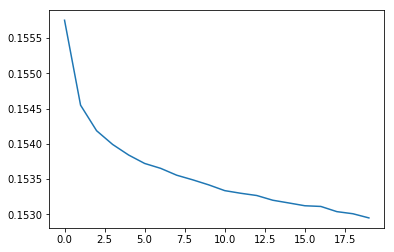

In [38]:
plt.plot(history.history['loss'],label="loss")

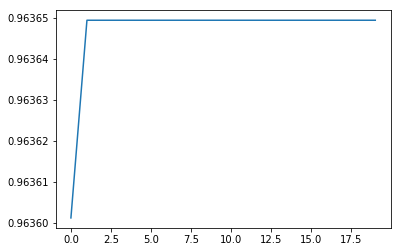

In [41]:
plt.plot(history.history['acc'],label="categorical_accuracy")

In [42]:
predictions = model.predict_proba(X_test)
predictions_label = model.predict_classes(X_test)

print('log_loss: {}'.format(log_loss(y_test, predictions)))
print('log_loss: {}'.format(log_loss(y_test, predictions)))

117088/119043 [============================>.] - ETA: 0slog_loss: 0.155528312867
log_loss: 0.155528312867


In [ ]:
117888/119043 [============================>.] - ETA: 0slog_loss: 0.155388533902
log_loss: 0.155388533902

In [211]:
predictions

array([[ 0.05255816],
       [ 0.04388293],
       [ 0.03853805],
       ..., 
       [ 0.0255963 ],
       [ 0.05526821],
       [ 0.06268914]], dtype=float32)

## Модель RandomForestClassifier

#### Зависимость качества от количесвта деревьев

In [48]:
n_trees = [1] + range(10, 30, 10)

In [50]:
%%time
scoring = []
for n_tree in n_trees:
    print n_tree
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=42)
    score = cross_validation.cross_val_score(estimator, X_train, y_train, 
                                             scoring = 'accuracy', cv = 2)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

1
10
20
CPU times: user 1min 47s, sys: 3.93 s, total: 1min 51s
Wall time: 2min 1s


In [51]:
scoring

matrix([[ 0.94134645,  0.9415571 ],
        [ 0.96372015,  0.9637294 ],
        [ 0.96373455,  0.963739  ]])

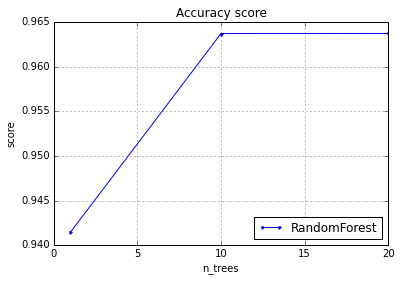

In [52]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

# TEST

In [57]:
predictions_zadacha = model.predict_proba(X_zadacha)

890112/892816 [============================>.] - ETA: 0s

In [58]:
predictions_zadacha

array([[ 0.03376983],
       [ 0.03388553],
       [ 0.0222657 ],
       ..., 
       [ 0.04295562],
       [ 0.02673575],
       [ 0.04098137]], dtype=float32)

In [59]:
predDF = df

In [65]:
predDF['target'] = predictions_zadacha

In [72]:
predDF1 = predDF['target']

In [73]:
predDF1

id
0          0.033770
1          0.033886
2          0.022266
3          0.027020
4          0.037137
5          0.031677
6          0.047656
8          0.034170
10         0.058890
11         0.068268
12         0.026394
14         0.034973
15         0.061378
18         0.057488
21         0.033843
23         0.043103
24         0.037923
25         0.032853
27         0.013669
29         0.044276
30         0.039741
31         0.043932
32         0.056988
33         0.024375
37         0.051109
38         0.044099
39         0.069656
40         0.035113
41         0.045966
42         0.032546
             ...   
1487982    0.029858
1487984    0.043615
1487985    0.046502
1487986    0.041439
1487987    0.056050
1487989    0.020557
1487991    0.022201
1487993    0.033973
1487995    0.043656
1487997    0.039717
1487998    0.051232
1487999    0.072074
1488000    0.045083
1488002    0.038417
1488003    0.043233
1488004    0.036199
1488006    0.048980
1488007    0.031528
1488010    0.0384

In [87]:
predDF1['target'].to_csv("first_sub_net.csv")